In [12]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
#save timestamp to check script's running time
startTime = datetime.now()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Saree'),
  Text(1, 0, 'Palazzo'),
  Text(2, 0, 'Stole'),
  Text(3, 0, 'Blouse'),
  Text(4, 0, 'Kurti'),
  Text(5, 0, 'Skirt'),
  Text(6, 0, 'Handkerchief'),
  Text(7, 0, 'Shirt'),
  Text(8, 0, 'Trousers')])

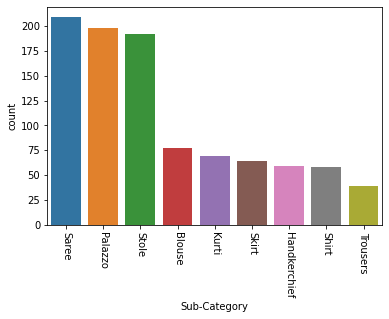

In [14]:
data=pd.read_csv('D:\SEM 4\MINI PROJECT\Order_Details_final.csv')
data.dropna(axis=0,subset=['Order ID'],inplace=True)
data=data[~data['Category'].str.contains('Electronics')]
data=data[~data['Category'].str.contains('Furniture')]
#plot 10 most frequent products in dataset
sns.countplot(x = 'Sub-Category', data = data, order = data['Sub-Category'].value_counts().iloc[:10].index)
plt.xticks(rotation=-90)

In [15]:
data.shape

(965, 6)

In [16]:
mybasket=(data.groupby(['Order ID','Sub-Category'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Order ID'))
mybasket.head()

Sub-Category,Blouse,Handkerchief,Kurti,Palazzo,Saree,Shirt,Skirt,Stole,Trousers
Order ID,,,,,,,,,
B-25601,0.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0
B-25602,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0
B-25603,0.0,5.0,0.0,2.0,3.0,6.0,0.0,10.0,8.0
B-25604,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
B-25605,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0


In [17]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
    
basket_sets=mybasket.applymap(encode)
basket_sets.head()



Sub-Category,Blouse,Handkerchief,Kurti,Palazzo,Saree,Shirt,Skirt,Stole,Trousers
Order ID,,,,,,,,,
B-25601,0,0,0,1,0,0,0,1,0
B-25602,0,0,0,0,1,0,0,0,0
B-25603,0,1,0,1,1,1,0,1,1
B-25604,1,0,0,0,1,0,0,0,0
B-25605,0,0,0,0,1,0,0,0,0


In [18]:
#create minTransactions variable to represent the minimum number of baskets for support parameter
minTransaction = 23
totalTransactions = len(basket_sets.index)
min_support_calc = minTransaction/totalTransactions

print('number of baskets for analysis is', totalTransactions)
print('minimum support value is ', round(min_support_calc*100, 4), '%')

number of baskets for analysis is 392
minimum support value is  5.8673 %


In [19]:
#create frequent items sets with clculated minimum support
frequent_itemsets = fpgrowth(basket_sets, min_support=0.06, use_colnames=True)
frequent_itemsets.describe()

,support
count,18.000000
mean,0.156037
std,0.111004
min,0.066327
25%,0.069515
50%,0.123724
75%,0.163903
max,0.400510


In [20]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Stole),(Palazzo),0.400510,0.352041,0.150510,0.375796,1.067479,0.009514,1.038057
1,(Palazzo),(Stole),0.352041,0.400510,0.150510,0.427536,1.067479,0.009514,1.047210
2,(Kurti),(Palazzo),0.168367,0.352041,0.066327,0.393939,1.119016,0.007054,1.069133
3,(Palazzo),(Kurti),0.352041,0.168367,0.066327,0.188406,1.119016,0.007054,1.024690
4,(Saree),(Kurti),0.395408,0.168367,0.068878,0.174194,1.034604,0.002304,1.007055
5,(Kurti),(Saree),0.168367,0.395408,0.068878,0.409091,1.034604,0.002304,1.023155
6,(Stole),(Kurti),0.400510,0.168367,0.068878,0.171975,1.021424,0.001445,1.004356
7,(Kurti),(Stole),0.168367,0.400510,0.068878,0.409091,1.021424,0.001445,1.014521
8,(Saree),(Skirt),0.395408,0.142857,0.071429,0.180645,1.264516,0.014942,1.046119
9,(Skirt),(Saree),0.142857,0.395408,0.071429,0.500000,1.264516,0.014942,1.209184


In [21]:
print('most sold pair of items are:','\n',rules[['antecedents','consequents','consequent support','confidence','lift']])

most sold pair of items are: 
   antecedents consequents  consequent support  confidence      lift
0     (Stole)   (Palazzo)            0.352041    0.375796  1.067479
1   (Palazzo)     (Stole)            0.400510    0.427536  1.067479
2     (Kurti)   (Palazzo)            0.352041    0.393939  1.119016
3   (Palazzo)     (Kurti)            0.168367    0.188406  1.119016
4     (Saree)     (Kurti)            0.168367    0.174194  1.034604
5     (Kurti)     (Saree)            0.395408    0.409091  1.034604
6     (Stole)     (Kurti)            0.168367    0.171975  1.021424
7     (Kurti)     (Stole)            0.400510    0.409091  1.021424
8     (Saree)     (Skirt)            0.142857    0.180645  1.264516
9     (Skirt)     (Saree)            0.395408    0.500000  1.264516


In [22]:
print('It took ', datetime.now() - startTime, ' to run')

It took  0:00:07.351395  to run
